In [2]:
import json
with open("eye_tracking_data/2024-12-15_12_32_49.225279.txt") as file:
    js = json.load(file)
    print(js)

{'eye_tracking_data': {'Image': [{'event_id': 0, 'miliseconds_since_start': 858.1961, 'has_started_looking': True}, {'event_id': 1, 'miliseconds_since_start': 900.9016, 'has_started_looking': False}, {'event_id': 2, 'miliseconds_since_start': 937.721, 'has_started_looking': True}, {'event_id': 4, 'miliseconds_since_start': 2911.0277, 'has_started_looking': False}, {'event_id': 5, 'miliseconds_since_start': 2913.0283, 'has_started_looking': True}, {'event_id': 6, 'miliseconds_since_start': 3209.1466, 'has_started_looking': False}, {'event_id': 7, 'miliseconds_since_start': 3878.2708000000002, 'has_started_looking': True}, {'event_id': 9, 'miliseconds_since_start': 5254.532, 'has_started_looking': False}, {'event_id': 10, 'miliseconds_since_start': 5254.532, 'has_started_looking': True}, {'event_id': 12, 'miliseconds_since_start': 6318.092500000001, 'has_started_looking': False}, {'event_id': 13, 'miliseconds_since_start': 6334.3876, 'has_started_looking': True}, {'event_id': 14, 'milise

In [3]:
eyetrackdata = 0
for key in js["eye_tracking_data"]:
    print(key)

    eyetrackdata = list(js["eye_tracking_data"][key])

print(eyetrackdata)

eyetrackdata.sort(key=lambda x :x["event_id"])
print(eyetrackdata)

Image
[{'event_id': 0, 'miliseconds_since_start': 858.1961, 'has_started_looking': True}, {'event_id': 1, 'miliseconds_since_start': 900.9016, 'has_started_looking': False}, {'event_id': 2, 'miliseconds_since_start': 937.721, 'has_started_looking': True}, {'event_id': 4, 'miliseconds_since_start': 2911.0277, 'has_started_looking': False}, {'event_id': 5, 'miliseconds_since_start': 2913.0283, 'has_started_looking': True}, {'event_id': 6, 'miliseconds_since_start': 3209.1466, 'has_started_looking': False}, {'event_id': 7, 'miliseconds_since_start': 3878.2708000000002, 'has_started_looking': True}, {'event_id': 9, 'miliseconds_since_start': 5254.532, 'has_started_looking': False}, {'event_id': 10, 'miliseconds_since_start': 5254.532, 'has_started_looking': True}, {'event_id': 12, 'miliseconds_since_start': 6318.092500000001, 'has_started_looking': False}, {'event_id': 13, 'miliseconds_since_start': 6334.3876, 'has_started_looking': True}, {'event_id': 14, 'miliseconds_since_start': 6721.0

In [4]:
totalcount =  eyetrackdata[-1]['event_id']

totallooktime = 0
prev_timestamp = 0
prev_started = False
timestamps = totalcount * [0,]
totallooktime_for_each_timestamp = totalcount * [0,]

print(f"total time {totallooktime}")
for event in eyetrackdata:
    current_timestamp = event['miliseconds_since_start']
    timestamps.append(current_timestamp/1000)
        
    if prev_started and not event['has_started_looking']:
        totallooktime += current_timestamp - prev_timestamp
        totallooktime_for_each_timestamp.append(totallooktime/1000)
    else:
        totallooktime_for_each_timestamp.append(totallooktime/1000)

        

    prev_timestamp = current_timestamp
    prev_started = event['has_started_looking']


total time 0


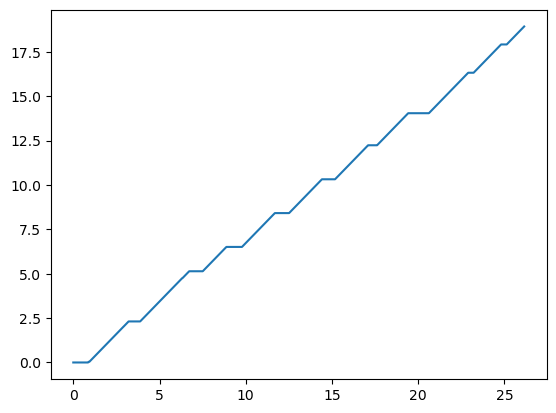

In [5]:
import matplotlib.pyplot as plt

plt.plot(timestamps,totallooktime_for_each_timestamp)

In [6]:
stepdata = list(js["step_switches"])
stepdata.sort(key = lambda x : x["event_id"])


In [7]:
step_timestamps = []
steps = []

for event in stepdata:
    step_timestamps.append(event["miliseconds_since_start"]/1000)
    steps.append(event["step_number"])

In [8]:
print(step_timestamps,steps)
print(timestamps,totallooktime_for_each_timestamp)

time_spent_at_step_switch = []
for t,step in zip(step_timestamps,steps):
    

    i = 0
    while timestamps[i] < t:
        if i >= len(timestamps)-1:
            break
        i += 1

    tt0 = totallooktime_for_each_timestamp[i-1]
    tt1 = totallooktime_for_each_timestamp[i]

    t0 = timestamps[i-1]
    t1 = timestamps[i]

    interpolated_time = tt0 + (t-t0)*(tt1-tt0)/(t1-t0)
    time_spent_at_step_switch.append((step,interpolated_time))

print(time_spent_at_step_switch)

[2.8702573, 5.1112098, 6.2750657, 8.5242521, 10.926453000000002, 11.3759969, 13.6817033, 14.1273496, 16.3433509, 16.724047600000002, 18.660460999999998, 19.0788593, 21.903260000000003, 23.9648705, 26.1445858] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8581961, 0.9009016000000001, 0.937721, 2.9110277, 2.9130283, 3.2091466, 3.8782708, 5.254532, 5.254532, 6.3180925000000006, 6.3343876, 6.7210394, 7.5079139, 8.8194035, 8.8204024, 8.878981300000001, 9.782320200000001, 11.6882132, 12.5140094, 14.418629300000001, 15.178212000000002, 15.474540000000001, 15.474540000000001, 17.0610226, 17.0610226, 17.0912935, 17.0912935, 17.094294400000003, 17.6148419, 17.622841800000003, 17.622841800000003, 19.4204955, 20.6199629, 22.8994457, 23.2126437, 24.8064039, 25.1323915, 26.1445858] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [9]:
time_spent_step = []
prev_time = time_spent_at_step_switch[0][1]
for step,time in time_spent_at_step_switch :
    
    time_spent_step.append((step,time - prev_time))
    prev_time = time

print(time_spent_step)
 

[(1, 0.0), (2, 1.5698276999999998), (3, 1.1638559000000002), (4, 1.4460168000000007), (5, 1.4978631000000018), (6, 0.44954389999999833), (7, 1.479910199999999), (8, 0.44564629999999994), (9, 1.4564185999999992), (10, 0.38069670000000144), (11, 1.4158659), (12, 0.41839830000000333), (13, 1.6249333000000004), (14, 1.748412499999997), (15, 1.8537277000000003)]


In [10]:
time_spent_per_step = {}
for step,time in time_spent_step:
    if step not in time_spent_per_step:
        time_spent_per_step[step] = time
    else:
        time_spent_per_step[step] += time
print(time_spent_per_step)

{1: 0.0, 2: 1.5698276999999998, 3: 1.1638559000000002, 4: 1.4460168000000007, 5: 1.4978631000000018, 6: 0.44954389999999833, 7: 1.479910199999999, 8: 0.44564629999999994, 9: 1.4564185999999992, 10: 0.38069670000000144, 11: 1.4158659, 12: 0.41839830000000333, 13: 1.6249333000000004, 14: 1.748412499999997, 15: 1.8537277000000003}


ValueError: x and y must be the same size

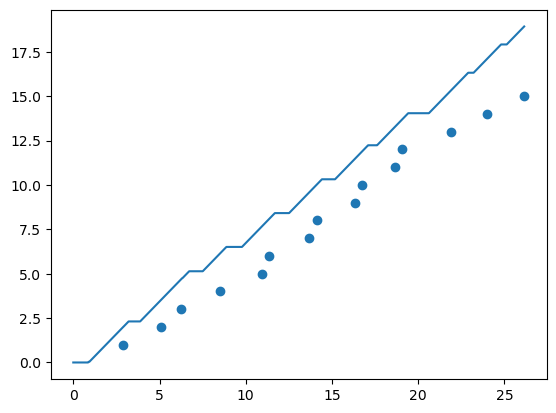

In [11]:
plt.plot(timestamps,totallooktime_for_each_timestamp)
plt.scatter(step_timestamps,steps)
plt.scatter(step_timestamps,time_spent_at_step_switch)

In [112]:
time_spent = []
prev_time = step_timestamps[0]
for timestamp,istep in zip(step_timestamps[1:],steps[:-1]):
    
    time_spent.append((istep,timestamp - prev_time))
    prev_time = timestamp
 

In [113]:
time_spent

[(1, 2240.9525000000003),
 (2, 1163.8558999999996),
 (3, 2249.1863999999996),
 (4, 2402.2009000000016),
 (5, 449.54389999999876),
 (6, 2305.706400000001),
 (7, 445.64630000000034),
 (8, 2216.0013),
 (9, 380.6967000000004),
 (10, 1936.4133999999976),
 (11, 418.39830000000075),
 (12, 2824.400700000002),
 (13, 2061.610499999999),
 (14, 2179.7153)]

In [114]:
time_per_step = {}
for step,time in time_spent:
    if step not in time_per_step:
        time_per_step[step] = time/1000
    else:
        time_per_step[step] += time/1000


In [115]:
print(time_per_step)

{1: 2.2409525, 2: 1.1638558999999995, 3: 2.2491863999999997, 4: 2.4022009000000017, 5: 0.4495438999999988, 6: 2.305706400000001, 7: 0.44564630000000033, 8: 2.2160013, 9: 0.38069670000000044, 10: 1.9364133999999977, 11: 0.4183983000000007, 12: 2.8244007000000018, 13: 2.0616104999999987, 14: 2.1797153}
